In [22]:
import os
import shutil
import torch
import torchvision
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

classes = ["Bread", "Dairy_product", "Dessert", "Egg", "Fried_food",
          "Meat", "Noodles_or_Pasta", "Rice", "Seafood", "Soup", "Vegetable_or_Fruit"]

label_id = list()
for i in range(len(classes)):
    label_id.append(i)


labels_dict = {}
for label in classes:
    labels_dict[label] = []

    
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [23]:
train_path = '/home/joar/deep_learning/assignment6/archive/food-11/training/'
test_path = '/home/joar/deep_learning/assignment6/archive/food-11/evaluation/'
parent_dir = "/home/joar/deep_learning/assignment6/archive/"
new_dir_name = "sorted_train"
new_test = "sorted_test"

path = os.path.join(parent_dir, new_dir_name)
path_test = os.path.join(parent_dir, new_test)

try:
    os.mkdir(path)
except FileExistsError:
    pass

for label in classes:
    new_path = os.path.join(path, label)
    try:
        os.mkdir(new_path)
    except FileExistsError:
        pass

try:
    os.mkdir(path_test)
except FileExistsError:
    pass

for label in classes:
    new_path = os.path.join(path_test, label)
    try:
        os.mkdir(new_path)
    except FileExistsError:
        pass

In [3]:
# for file in os.listdir(train_path):
#     for index in range(len(labels)):
#         if file.startswith((str(index)+ "_")):
#             the_path = os.path.join(path, labels[index])
#             shutil.copy(train_path + file, the_path)

In [4]:
# for file in os.listdir(test_path):
#     for index in range(len(labels)):
#         if file.startswith((str(index)+ "_")):
#             the_path = os.path.join(path_test, labels[index])
#             shutil.copy(test_path + file, the_path)



In [24]:
TRAIN_DATA_PATH = "/home/joar/deep_learning/assignment6/archive/sorted_train"
TEST_DATA_PATH = "/home/joar/deep_learning/assignment6/archive/sorted_test"
BATCH_SIZE = 4

In [25]:
transform = transforms.Compose(
    [transforms.Resize(512),
     transforms.CenterCrop(512),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=transform)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 

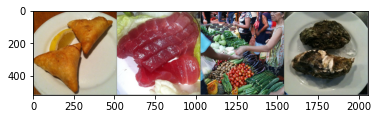

Fried_food Seafood Vegetable_or_Fruit Seafood


In [26]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

In [48]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
#       Input shape (4, 3, 512, 512)
        
#       Output size after convolution
#       w = initial img size, k = kernel size, s = stride, p = padding
#       ((w - k + 2P)/s) + 1

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1)
        #Shape = (4, 12, 512, 512)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        #Shape = (4, 12, 512, 512)
        self.relu1=nn.ReLU()
        #Shape = (4, 12, 512, 512)
        
        self.pool = nn.MaxPool2d(2, 2)
        #Shape = (4, 12, 256, 256)
        
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, padding=1)
        #Shape = (4, 20, 256, 256)
        self.relu2=nn.ReLU()
        #Shape = (4, 20, 256, 256)
        
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, padding=1)
        #Shape = (4, 32, 256, 256)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        #Shape = (4, 32, 256, 256)
        self.relu3=nn.ReLU()
        #Shape = (4, 32, 256, 256)
        
        self.fc = nn.Linear(in_features=256*256*32, out_features=11)
        
    def forward(self, input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        
        output=self.pool(output)
        
        output=self.conv2(output)
        output=self.relu2(output)
        
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        
        #Above output will be in matrix form, with shape(4, 32, 256, 256)
        
        output = output.view(-1, 256*256*32)
        
        output=self.fc(output)
        
        return output
        
        
        

net = Net()

In [49]:
#Optimizer and loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, weight_decay=0.0001)
loss_function= nn.CrossEntropyLoss()


In [46]:
# for i, data in enumerate(train_data_loader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         print(outputs.shape)

In [47]:
best_accuracy = 0.0

for epoch in range(2):  # loop over the dataset multiple times
    #Evaluation and training on training dataset
    net.train()
    train_accuracy = 0.0
    train_loss = 0.0
    
    for i, (images, labels) in enumerate(train_data_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs=net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.cpu().data*images.size(0)
        _,prediction = torch.max(outputs.data, 1)
        
        train_accuracy += int(torch.sum(prediction==labels.data))
    
    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count
        
    
    # Evaluation on testing dataset
    net.eval()
    
    test_accuracy = 0.0
    for i, (images, labels) in enumerate(train_data_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        test_accuracy += int(torch.sum(prediction==labels.data))
    
    test_accuracy = test_accuracy / test_count
    
    print("Epoch:" + str(epoch) + "Train loss: " + str(int(train_loss)) + "Train Accuracy: " + str(train_accuracy) + "Test Accuracy" + str(test_accuracy))

KeyboardInterrupt: 

In [52]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.203
[1,   400] loss: 0.200
[1,   600] loss: 0.196
[1,   800] loss: 0.200
[1,  1000] loss: 0.199
[1,  1200] loss: 0.199
[1,  1400] loss: 0.191
[1,  1600] loss: 0.200
[1,  1800] loss: 0.194
[1,  2000] loss: 0.200
[1,  2200] loss: 0.191
[1,  2400] loss: 0.194
[2,   200] loss: 0.172
[2,   400] loss: 0.187
[2,   600] loss: 0.184
[2,   800] loss: 0.183
[2,  1000] loss: 0.180
[2,  1200] loss: 0.189
[2,  1400] loss: 0.172
[2,  1600] loss: 0.177
[2,  1800] loss: 0.179
[2,  2000] loss: 0.181
[2,  2200] loss: 0.176
[2,  2400] loss: 0.182
Finished Training


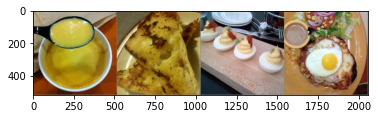

GroundTruth:   Soup Bread   Egg   Egg


In [54]:
dataiter = iter(test_data_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [55]:
outputs = net(images)

In [57]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   Soup Fried_food Fried_food Dessert


In [58]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 3347 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 3347 test images: 28 %


In [60]:
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Bread :  3 %
Accuracy of Dairy_product : 15 %
Accuracy of Dessert : 41 %
Accuracy of   Egg : 19 %
Accuracy of Fried_food : 46 %
Accuracy of  Meat : 60 %
Accuracy of Noodles_or_Pasta : 10 %
Accuracy of  Rice :  4 %
Accuracy of Seafood :  4 %
Accuracy of  Soup : 32 %
